# Path module demo


In [1]:
import pandas as pd

from patterns_detection_module.path import PathModel

C:\Users\danie\Anaconda3\envs\Access_control_patterns_detection\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
FILE_PATH = 'model.pkl'
TEST_BATCH = 100
# building nums
building_num = 13
# gates code table
gates_code_table = pd.read_csv('../test_data/gate_code.csv').set_index('gate').to_dict()['id']
gates_code_table

{'1-01-I01': 0,
 '1-01-O02': 1,
 '10-01-I01': 2,
 '10-01-I02': 3,
 '10-01-I03': 4,
 '10-01-I04': 5,
 '10-01-O01': 6,
 '10-01-O02': 7,
 '10-01-O03': 8,
 '10-01-O04': 9,
 '11-01-I01': 10,
 '11-01-I02': 11,
 '11-01-O01': 12,
 '11-01-O02': 13,
 '12-01-I01': 14,
 '12-01-O01': 15,
 '13-01-I01': 16,
 '13-01-I02': 17,
 '13-01-I03': 18,
 '13-01-O01': 19,
 '13-01-O02': 20,
 '13-01-O03': 21,
 '2-01-I01': 22,
 '2-01-I02': 23,
 '2-01-O02': 24,
 '3-01-I03': 25,
 '3-01-I08': 26,
 '3-01-I12': 27,
 '3-01-O03': 28,
 '3-01-O04': 29,
 '3-01-O08': 30,
 '3-01-O09': 31,
 '3-01-O12': 32,
 '4-01-I08': 33,
 '4-01-I09': 34,
 '4-01-I10': 35,
 '4-01-I11': 36,
 '4-01-O09': 37,
 '4-01-O10': 38,
 '4-01-O11': 39,
 '5-01-I03': 40,
 '5-01-I05': 41,
 '5-01-I06': 42,
 '5-01-I07': 43,
 '5-01-I08': 44,
 '5-01-O04': 45,
 '5-01-O05': 46,
 '5-01-O06': 47,
 '5-01-O07': 48,
 '5-01-O08': 49,
 '6-01-I01': 50,
 '6-01-I02': 51,
 '6-01-O01': 52,
 '7-01-I01': 53,
 '7-01-I02': 54,
 '7-01-I03': 55,
 '7-01-I04': 56,
 '7-01-I05': 57,
 '7-

In [3]:
# read access control data
raw_data = pd.read_csv('../test_data/test_data1.csv', dtype={'building': str, 'floor': str, 'IO': str})
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])
raw_data.head()

,datetime,building,floor,IO,employee_ID
0,2017-01-01 07:20:47,5,01,I06,A
1,2017-01-01 10:52:52,5,01,O06,A
2,2017-01-01 11:14:00,5,01,I05,A
3,2017-01-01 16:05:37,5,01,O06,A
4,2017-01-01 16:27:10,5,01,I05,A


In [4]:
# create path model
path_model = PathModel()
x, y = path_model.data_encoding(raw_data=raw_data, building_num=building_num,gates_code_table=gates_code_table)
# split training and test data
x_raw_data, y_raw_data = raw_data.iloc[:-TEST_BATCH], raw_data.iloc[-TEST_BATCH:]
x_train, x_test = x[:-TEST_BATCH], x[-TEST_BATCH:]
y_train, y_test = y[:-TEST_BATCH], y[-TEST_BATCH:]

print(x[0])
print(y[0])

[0.29166667 0.33333333 0.78333333 1.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
47.0


In [5]:
# train model
path_model.fit(X=x_train, y=y_train)
# save model
path_model.save_model(filename=FILE_PATH)
# load pre-trained model
path_model.load_model(filename=FILE_PATH)


In [6]:
# predict gate code
y_pred = path_model.predict(X=x_test)
print(y_pred[:5])


[46. 41. 46. 42. 46.]


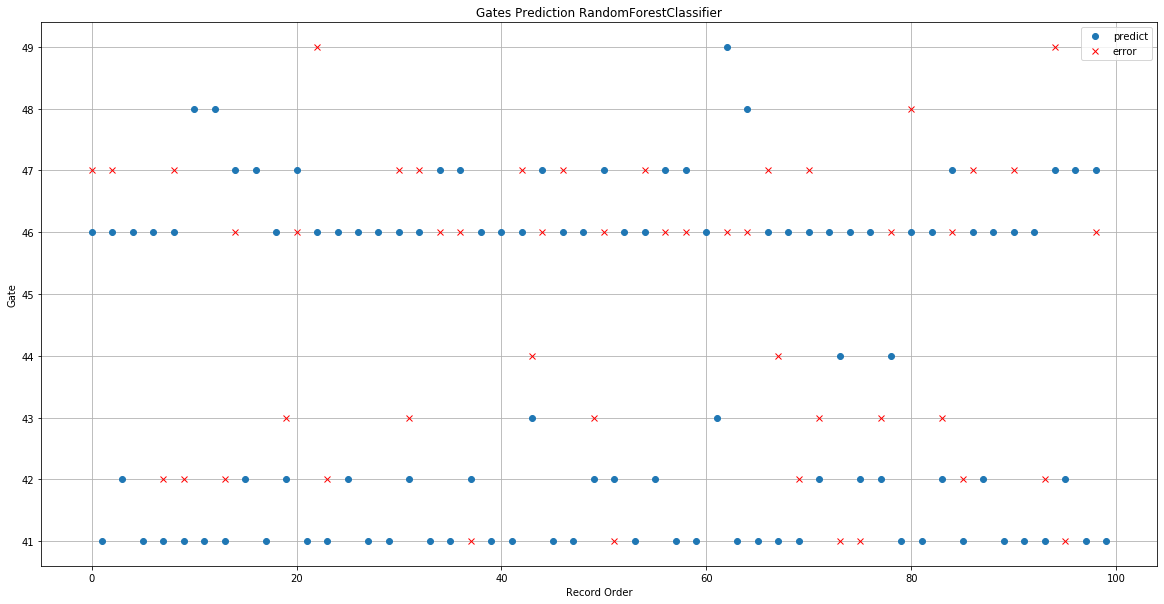

In [7]:
# plot predict and truth gates
path_model.plot_output(y_test, y_pred)



In [8]:
# output wrong predict cases
path_model.to_csv('output.csv', y_raw_data, y_test, y_pred)



In [9]:
pd.read_csv('output.csv',index_col=[0]).head()


,id,datetime,employee_ID,real_gate_code,predict_gate_code
0,0,2017-11-27 12:11:10.017,A,47.0,46.0
1,2,2017-11-27 17:27:16.727,A,47.0,46.0
2,7,2017-11-28 16:07:16.407,A,42.0,41.0
3,8,2017-11-28 16:23:20.733,A,47.0,46.0
4,9,2017-11-28 19:39:04.600,A,42.0,41.0


In [10]:
print('Accuracy = {:.3f}'.format(path_model.score(X=x_test[:-1], y=y_test[:-1])))


Accuracy = 0.515
